# Logistic Regression

Logistic Regression is a linear classification algorithm. Classification is a problem in which the task is to assign a category/class to a new instance learning the properties of each class from the existing labeled data, called training set. Examples of classification problems can be classifying emails as spam and non-spam, looking at height, weight, and other attributes to classify a person as fit or unfit, etc.


In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

**Why should we learn Logistic Regression?**

- It is the first supervised learning algorithm that comes to the mind of data science practitioners to create a strong baseline model to check the uplift.

- It is a fundamental, powerful, and easily implementable algorithm. It is also a very intuitive and interpretable model as the final outputs are coefficients depicting the relationship between response variable and features.

**Is logistic regression a regressor or a classifier?**

Logistic regression is usually used as a classifier because it predicts discrete classes.
Having said that, it technically outputs a continuous value associated with each prediction, by producing a probability score along with its classification prediction.

So we see that it is actually a regression algorithm that can solve classification problems.


## What parameters can be tuned in logistic regression models?

There are several hyperparameters that can be optimized in Logistic Regression. To see all the available ones and their possible values, click: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

However, here we will show you the main hyperparameters we may tune in logistic regression.

**Solver** is the algorithm to use in the optimization problem. The choices are {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, and the default value is ’lbfgs’.

- *lbfgs* relatively performs well compared to other methods and it saves a lot of memory, however, sometimes it may have issues with convergence.

- *sag* faster than other solvers for large datasets, when both the number of samples and the number of features are large.

- *saga* the solver of choice for sparse multinomial logistic regression and it’s also suitable for very large datasets.

- *newton-cg* computationally expensive because of the Hessian Matrix.

- *liblinear* recommended when you have a high dimension dataset - solving large-scale classification problems. 

>Note: ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale. You can preprocess the data with a scaler from sklearn.preprocessing.

**Penalty (or regularization)** intends to reduce model generalization error, and is meant to disincentivize and regulate overfitting. Technique discourages learning a more complex model, so as to avoid the risk of overfitting. The choices are: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, and the default value is ’l2’. 

>Note: not all solvers support all regularization terms.

**C (or regularization strength)** must be a positive float. Regularization strength works with the penalty to regulate overfitting. Smaller values specify stronger regularization and high value tells the model to give high weight to the training data.   


Logistic regression offers other parameters like: 

- class_weight

- dualbool (for sparse datasets when n_samples > n_features)

- max_iter (may improve convergence with higher iterations), and others. However, these provide less impact.

## Using logistic regression in Titanic survival prediction

In Titanic dataset we have more than one feature, and with logistic regression we predict whether they survive or not. If the value the model predict would be 0.85, that would mean the person is 85% a survivor and 15% not a survivor.

Let's imagine the titanic dataset only had one feature(Sex) and we would like to predict if the passenger survives or not, what we are trying to calculate is basically:

$P(survive|sex=male)$

$P(survive|sex=female)$

When the probability is greater or equal than 0.5, the binary value is 1, and when the probability is less than 0.5, the binary value is 0. So, the person we just mentioned above would be classified as 1, which means he or she survived. 

### The logistic regression curve

![logistic_regression_curve](https://github.com/4GeeksAcademy/machine-learning-content/blob/master/assets/logistic_regression_curve.jpg?raw=true)

The logistic function, also called the sigmoid function is an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1, but never exactly at those limits.

Logistic regression uses maximum-likelihood estimation, which calculates the likelihood of one person being a survivor on Titanic, and then another one, and then another one. After all calculations are done, the model multiplies all those likelihoods and fits the S-shaped line to the data. Keeps calculating, until it finds the best S-shaped line. 

### The logistic regression equation

Input values (x) are combined linearly using weights or coefficient values (referred to as the Greek capital letter Beta) to predict an output value (y). A key difference from linear regression is that the output value being modeled is a binary values (0 or 1) rather than a numeric value.

Below is an example logistic regression equation:

$y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))$

Where y is the predicted output, b0 is the bias or intercept term and b1 is the coefficient for the single input value (x). Each column in your input data has an associated b coefficient (a constant real value) that must be learned from your training data. This is done using maximum-likelihood estimation. The intuition for maximum-likelihood for logistic regression is that a search procedure seeks values for the coefficients (Beta values) that minimize the error in the probabilities predicted by the model to those in the data.

The actual representation of the model that you would store in memory or in a file are the coefficients in the equation (the beta value or b’s).

To get the probabilities with Python you can use:

```py

y_pred = model.predict_proba(X_test)
roc_auc_score(y_test, y_pred)

```

This will give you an array of 'probability to be in each class' given to each observation, but you can also get the probability to be in the class '1':

```py

# Score

y_pred = model.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

```

### Titanic Modeling

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

**Loading the final dataframe**

In order to start modeling, we will focus on our train data and forget temporarily about the dataset where we need to make predictions.

Let's start by loading our clean titanic train data and name it final_df.

In [2]:
# loading clean train dataset

final_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_train.csv')

In [3]:
# Let's take a look at our first 10 rows to verify all data is numerical

final_df.head(10)

,Unnamed: 0,Embarked_C,Embarked_Q,Embarked_S,Female,Male,Survived,Pclass,Age,SibSp,Parch,Fare,fam_mbrs
0,0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.271174,1.0,0.0,0.027567,1.0
1,1,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.472229,1.0,0.0,0.271039,1.0
2,2,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.321438,0.0,0.0,0.030133,0.0
3,3,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.434531,1.0,0.0,0.201901,1.0
4,4,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.434531,0.0,0.0,0.030608,0.0
5,5,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.346569,0.0,0.0,0.032161,0.0
6,6,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.673285,0.0,0.0,0.197196,0.0
7,7,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.019854,3.0,1.0,0.080133,4.0
8,8,0.0,0.0,1.0,1.0,0.0,1.0,3.0,0.334004,0.0,2.0,0.042332,2.0
9,9,1.0,0.0,0.0,1.0,0.0,1.0,2.0,0.170646,1.0,0.0,0.114338,1.0


**Separate features and target as X and y**

In [4]:
X = final_df.drop(['Survived','Unnamed: 0'], axis=1)
y = final_df['Survived']

**Split dataframe in training set and testing set**

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression

model = LogisticRegression()

In [7]:
# Fit the data

model.fit(X_train, y_train)

LogisticRegression()

In [35]:
# Make predictions
y_pred = model.predict(X_test)
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1.])

In [37]:
# Check the accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score

accuracy_score(y_test, y_pred)

0.8146067415730337

In [39]:
# Confusion Matrix

titanic_cm = confusion_matrix(y_pred, y_test)
titanic_cm

array([[87, 16],
       [17, 58]])

If you want you can put your confusion matrix a more beautiful graph

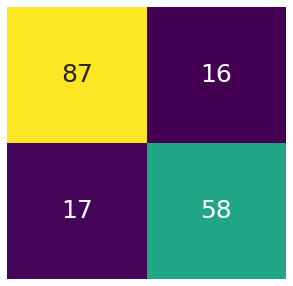

In [41]:
# convert the ndarray to a pandas dataframe
cm_df = pd.DataFrame(titanic_cm)
# set the size of the figure
plt.figure(figsize = (5,5))
sns.heatmap(cm_df, 
           annot=True, annot_kws={"size": 25},
           fmt="d",         # decimals format
           xticklabels=False, 
           yticklabels=False,
           cmap="viridis", 
           cbar=False)
plt.show()

Observations: 16 + 17 = 33 wrong prediction. Can we can do better?

Let's use GridSearch to see what would be the best hyperparameters for our Logistic Regression model. 

The code below demonstrates grid searching the key hyperparameters for LogisticRegression on a binary classification dataset, in this case our Titanic dataset.

In [22]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# define models and parameters

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X, y)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.798102 using {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793216 (0.032933) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793216 (0.032933) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.792833 (0.031946) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.793212 (0.032824) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.793212 (0.032824) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.793969 (0.031699) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.796582 (0.034081) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.796582 (0.034081) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.796229 (0.036167) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.798102 (0.037820) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.798102 (0.037820) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.797706 (0.040030) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.783801 (0.034749) wit

Solver newton-cg supports only 'l2' or 'none' penalties, that is why we only included 'l2'.


Observations: We actually got a better score first. Let's confirm these by getting the confusion matrix again.

In [42]:
# Hypertune parameters

optimized_model = LogisticRegression(C= 0.1, penalty='l2', solver= 'newton-cg')


In [43]:
# Fit the data

optimized_model.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='newton-cg')

In [44]:
# Make predictions
y_pred = optimized_model.predict(X_test)
y_pred

array([0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1.])

In [45]:
# Check the accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_pred, y_test)

0.8089887640449438

In [46]:
# Confusion Matrix

confusion_matrix(y_pred, y_test)

array([[85, 15],
       [19, 59]])

Observations: In effect, we now have 34 (15 + 19) wrong predictions. We had 33 with our first baseline model.

In the last data preprocessing module we learned some techniques of feature selection if needed. However, the final clean dataset was saved before any feature selection implementation. So let's a feature selection technique here and see if it makes our model improve.

**Recursive feature elimination**

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [47]:
from sklearn.feature_selection import RFE

# create the RFE model and select 9 attributes
rfe = RFE(model, n_features_to_select=9)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Female', 'Male', 'Pclass', 'Age', 'SibSp', 'fam_mbrs']


These are the 9 attributes suggested. But is 9 the optimal number of Titanic features to enter my model?

**Feature ranking with recursive feature elimination and cross-validation**

RFECV performs RFE in a cross-validation loop to find the optimal number or the best number of features. Hereafter a recursive feature elimination applied on logistic regression with automatic tuning of the number of features selected with cross-validation.

Optimal number of features: 8
Selected features: ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Female', 'Male', 'Pclass', 'Age', 'SibSp']


/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


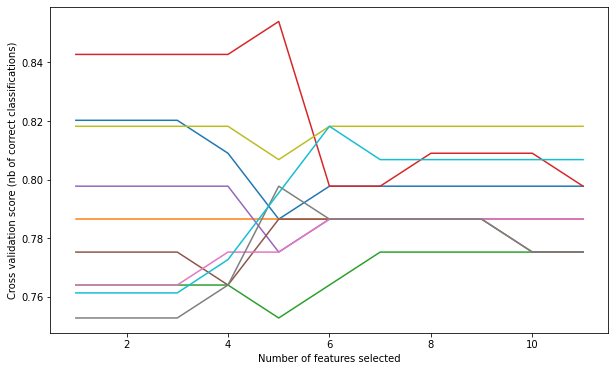

In [48]:
from sklearn.feature_selection import RFECV

# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications

rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores

plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Observations: We see that the optimal number of features suggested is actually 8. The total number of family members was not considered as important.

**Model evaluation based on K-fold cross-validation using cross_val_score() function**

- This time we are going to use a new features dataframe (new_X) with only the selected features.

- This time the split method will be K-fold cross-validation with 10 folds.

- The model will still be Logistic regression but we will use the best hyperparameters we got in the gridsearch.

- We know that accuracy is not always the best or always poor measure for assesing. There are many metrics like Recall, Precision, F1 Score and much more. We will propose 3 different evaluation metrics. The metrics proposed will be 'accuracy', 'neg_log_loss', and 'roc_auc'.

- Finally, the cross_val_score() function will be used to perform the evaluation, taking the dataset and cross-validation configuration and returning a list of scores calculated for each fold.


In [49]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

Selected_features = ['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Female', 'Male', 'Pclass', 'Age', 'SibSp']

# create new X (selected features) 
new_X = final_df[Selected_features]

# 10-fold cross-validation logistic regression, using the best hyperparameters gridsearch got for us.

logreg = LogisticRegression(C= 0.1, penalty='l2', solver= 'newton-cg')

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train anymore.
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric

scores_accuracy = cross_val_score(logreg, new_X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, new_X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, new_X, y, cv=10, scoring='roc_auc')

print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-fold cross-validation results:
LogisticRegression average accuracy is 0.798
LogisticRegression average log_loss is 0.459
LogisticRegression average auc is 0.847


Notice that by using the 'roc_auc' metric we would have got a better score than accuracy. If we would want to repeat our modeling process using this evaluation metric, consider using the predict_proba(X_test) to predict the probabilities also graph auc_roc curves, because if you use model.predict(X_test), the method won’t have all the necessary information to build all the points in the curve.

Let's finish our class predictions!

We need to fit the whole training data to the estimator once we are satisfied with the results of cross_val_score, before we can use it to predict on Titanic test data.

In [51]:
# Let's fit our entire titanic train data with this model

logreg.fit(new_X,y)

LogisticRegression(C=0.1, solver='newton-cg')

In the following code, let's see how to generate our predictions, and save them in a predictions file with the right Id.

In [52]:
#Load initial test set (the one that was not cleaned yet and where we need to make predictions)

initial_test_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/titanic_test.csv')

#Load cleaned test set

final_test = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/machine-learning-content/master/assets/clean_titanic_test.csv')

#Adding the column survived to clean test set in order to make predictions

final_test['Survived'] = logreg.predict(final_test[Selected_features])

#Putting the 'PassengerId' column back to test set

final_test['PassengerId'] = initial_test_df['PassengerId']

#Creating a final predictions dataframe

submission = final_test[['PassengerId','Survived']]

# Convert final dataframe in a csv file
# Normally this is the required csv file in Kaggle competitions

submission.to_csv("submission.csv", index=False)

Take a look at our predictions in the last rows of the test set

In [53]:
submission.tail()

,PassengerId,Survived
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0
417,1309,0.0


## Import considerations before modeling with Logistic Regression 

Ultimately in predictive modeling machine learning projects we are focused on making accurate predictions rather than interpreting the results. As such, we can break some assumptions as long as the model is robust and performs well.

- Binary Output Variable: This might be obvious as we have already mentioned it, but logistic regression is intended for binary (two-class) classification problems. It will predict the probability of an instance belonging to the default class, which can be snapped into a 0 or 1 classification.

- Remove Noise: Logistic regression assumes no error in the output variable (y), consider removing outliers and possibly misclassified instances from your training data.

- Gaussian Distribution: Logistic regression is a linear algorithm (with a non-linear transform on output). It does assume a linear relationship between the input variables with the output. Data transforms of your input variables that better expose this linear relationship can result in a more accurate model. For example, you can use log, root, Box-Cox and other univariate transforms to better expose this relationship.

- Remove Correlated Inputs: Like linear regression, the model can overfit if you have multiple highly-correlated inputs. Consider calculating the pairwise correlations between all inputs and removing highly correlated inputs.

- Fail to Converge: It is possible for the expected likelihood estimation process that learns the coefficients to fail to converge. This can happen if there are many highly correlated inputs in your data or the data is very sparse (e.g. lots of zeros in your input data).

Considering this, are there any changes you would do in your data preprocessing phase?

Source: 

https://towardsdatascience.com/a-handbook-for-logistic-regression-bb2d0dc6d8a8

https://www.displayr.com/how-to-interpret-logistic-regression-coefficients/

https://towardsdatascience.com/a-handbook-for-logistic-regression-bb2d0dc6d8a8

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/#:~:text=Logistic%20regression%20does%20not%20really,with%20different%20solvers%20(solver).&text=Regularization%20(penalty)%20can%20sometimes%20be%20helpful.

https://machinelearningmastery.com/logistic-regression-for-machine-learning/

https://www.kaggle.com/code/mnassrib/titanic-logistic-regression-with-python/notebook

https://www.kaggle.com/code/rmiperrier/tps-mar-lgbm-predict-proba-vs-predict?scriptVersionId=55643096

https://medium.com/codex/do-i-need-to-tune-logistic-regression-hyperparameters-1cb2b81fca69
